<a href="https://colab.research.google.com/github/RajeshworM/Yield_Modelling_Automation/blob/main/scatter_RMSE_sample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving forScatter4.csv to forScatter4.csv


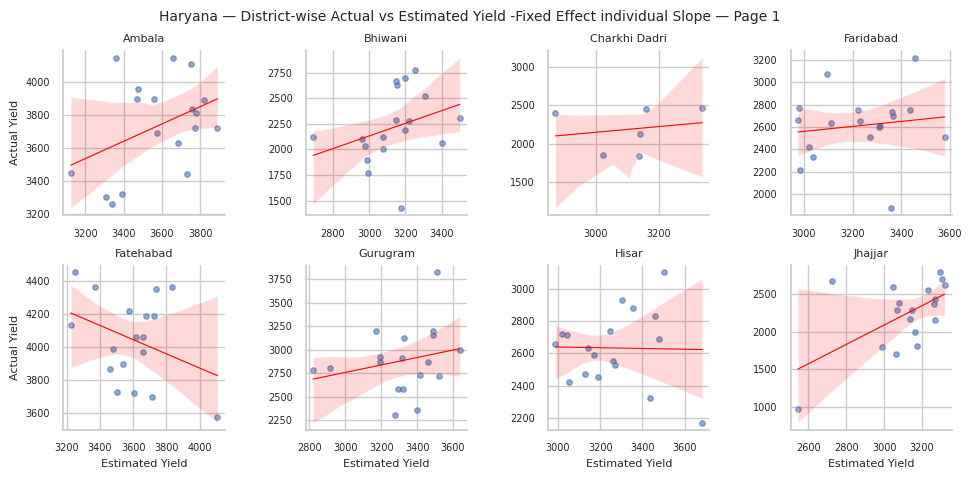

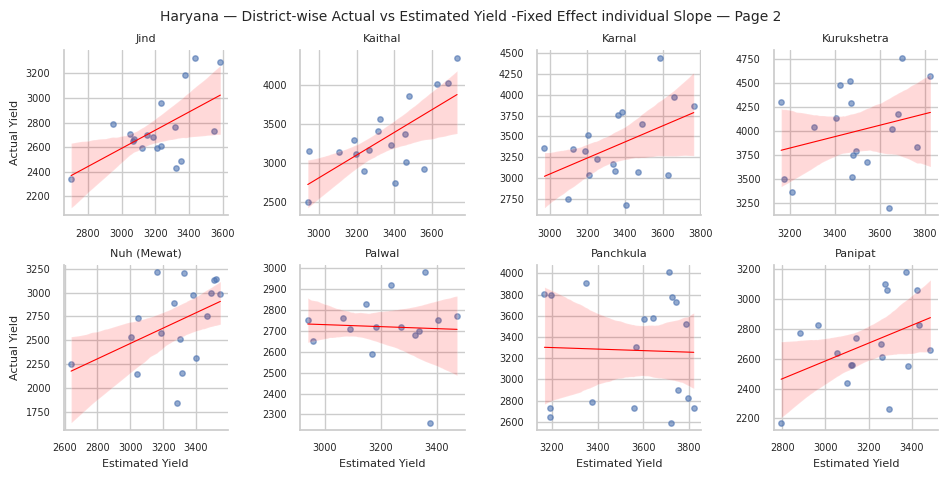

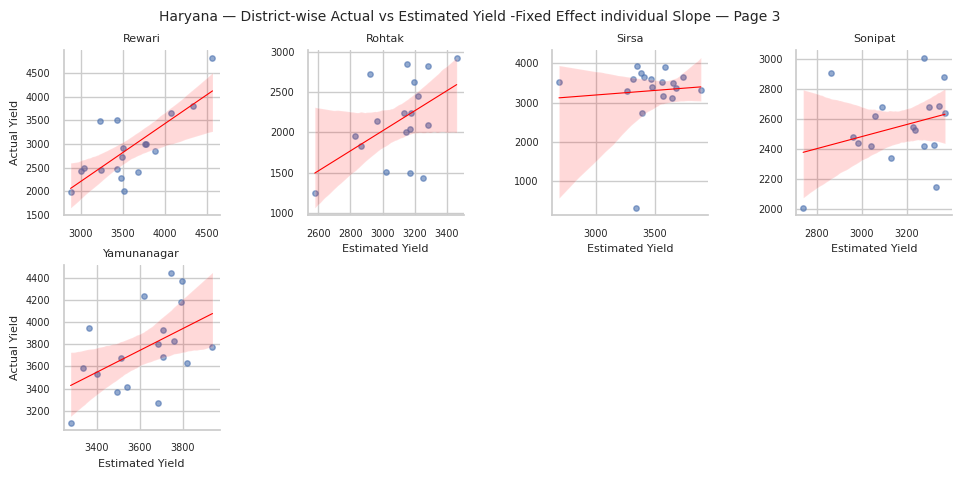

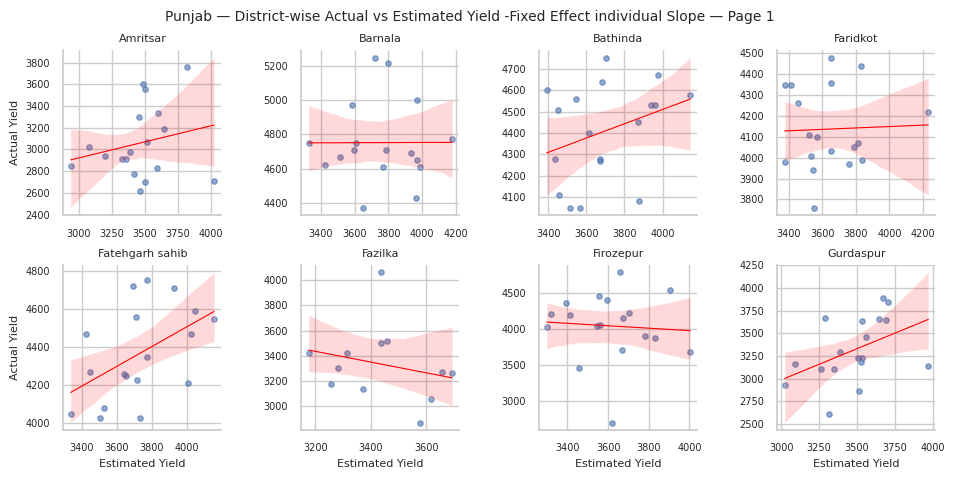

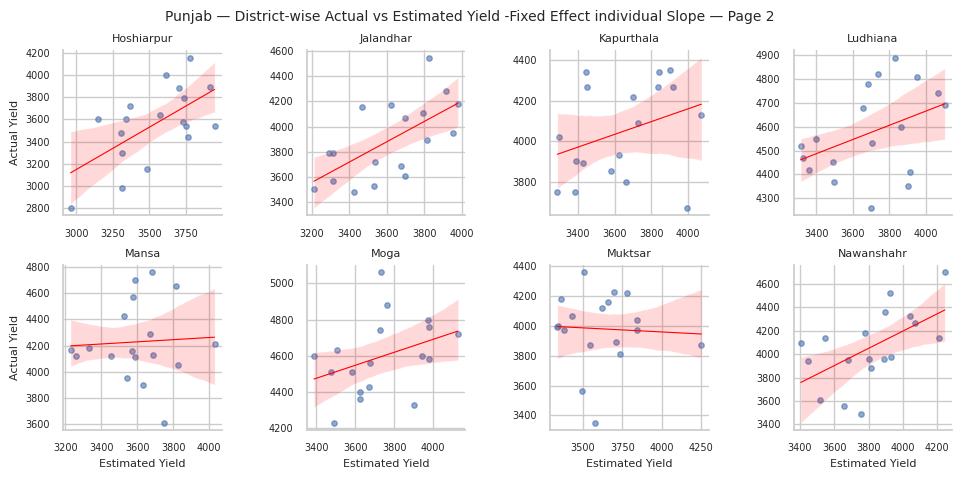

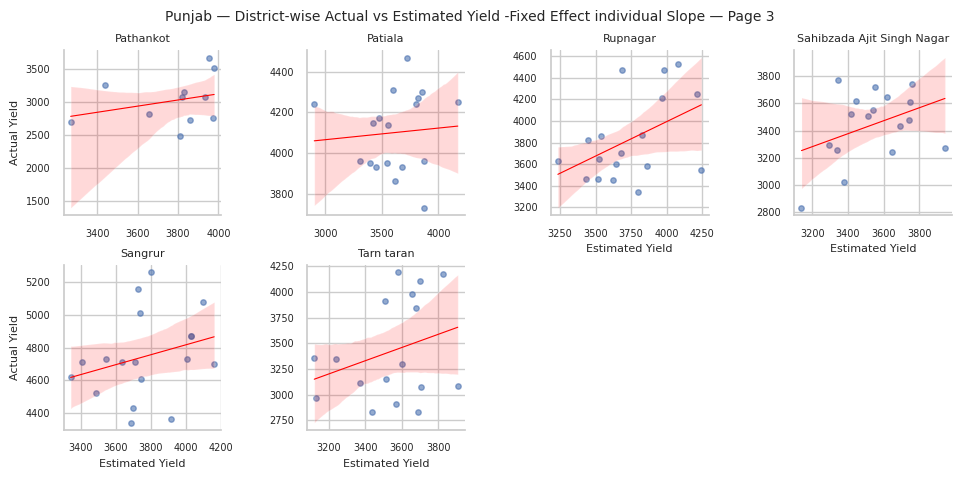

In [9]:
# 1️⃣ Upload your CSV
from google.colab import files
uploaded = files.upload()

# 2️⃣ Read your CSV
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv(list(uploaded.keys())[0])

# 3️⃣ Prepare small font theme
sns.set_theme(style="whitegrid", context="notebook")

# Get unique states
states_list = df["state"].unique()

# Function to split list into chunks of size n
def chunks(lst, n):
    for i in range(0, len(lst), n):
        yield lst[i:i + n]

# 4️⃣ Loop through each state separately
for state in states_list:
    df_state = df[df["state"] == state]

    # Get districts for this state
    districts_list = df_state["districts"].unique()

    # Create separate pages with 8 districts each
    for i, group in enumerate(chunks(districts_list, 8), start=1):
        subset = df_state[df_state["districts"].isin(group)]

        g = sns.FacetGrid(
            subset,
            col="districts",
            col_wrap=4,      # 4 columns → 2 rows → 8 plots
            height=2.5,
            sharex=False,
            sharey=False
        )
        g.map_dataframe(
            sns.regplot,
            x="Estimated",
            y="Actual",
            scatter_kws={"alpha":0.6, "s":15},  # small dots
            line_kws={"color":"red", "lw":0.8}  # thin line
        )

        g.set_titles(col_template="{col_name}", size=8)
        g.set_axis_labels("Estimated Yield", "Actual Yield", fontsize=8)

        for ax in g.axes.flatten():
            ax.tick_params(axis='both', labelsize=7)

        plt.subplots_adjust(top=0.9, hspace=0.3)
        g.fig.suptitle(
            f"{state} — District-wise Actual vs Estimated Yield -Fixed Effect individual Slope — Page {i}",
            fontsize=10
        )

        plt.show()


/tmp/ipython-input-2372883797.py:19: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(rmse_percent)
/tmp/ipython-input-2372883797.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


      State                    District    RMSE (%)
0   Haryana                      Ambala    7.972273
1   Haryana                     Bhiwani   51.053178
2   Haryana               Charkhi Dadri   47.779320
3   Haryana                   Faridabad   30.033400
4   Haryana                   Fatehabad   13.894263
5   Haryana                    Gurugram   21.589531
6   Haryana                       Hisar   28.616436
7   Haryana                     Jhajjar   57.402220
8   Haryana                        Jind   19.954401
9   Haryana                     Kaithal   11.358270
10  Haryana                      Karnal   11.956105
11  Haryana                 Kurukshetra   15.371480
12  Haryana                 Nuh (Mewat)   30.823383
13  Haryana                      Palwal   21.450939
14  Haryana                   Panchkula   21.834468
15  Haryana                     Panipat   22.253958
16  Haryana                      Rewari   34.264695
17  Haryana                      Rohtak   63.194384
18  Haryana 

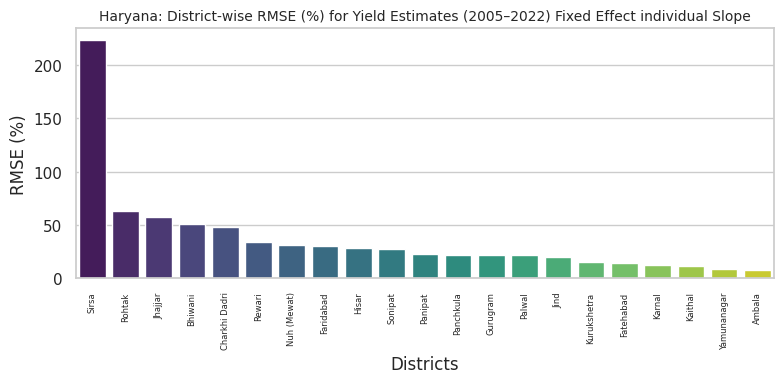

/tmp/ipython-input-2372883797.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


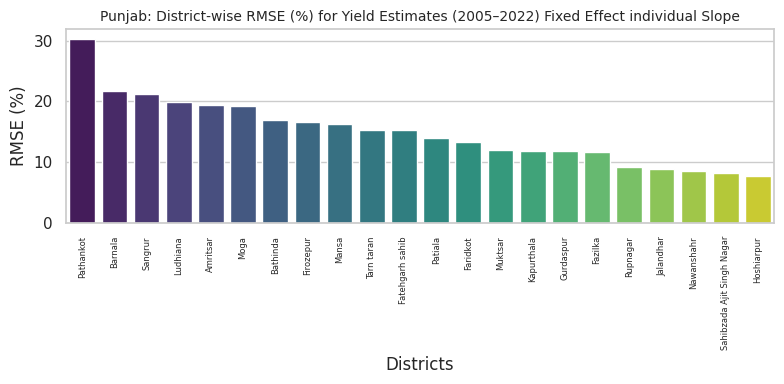

In [10]:
# --- RMSE (%) Calculation ---
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure year filter
df_filtered = df[(df["year"] >= 2001) & (df["year"] <= 2022)].copy()

# Function to compute RMSE (%)
def rmse_percent(x):
    errors = ((x["Estimated"] - x["Actual"]) / x["Actual"]) ** 2
    return np.sqrt(errors.mean()) * 100

# Group by state + district and calculate RMSE%
rmse_table = (
    df_filtered
    .groupby(["state", "districts"])
    .apply(rmse_percent)
    .reset_index()
)
rmse_table.columns = ["State", "District", "RMSE (%)"]

# --- Show table ---
pd.set_option("display.max_rows", None)  # show all rows
print(rmse_table)

# --- Optional: save table to CSV ---
rmse_table.to_csv("state_districtwise_RMSE.csv", index=False)

# --- Graphical representation ---
for state in rmse_table["State"].unique():
    subset = rmse_table[rmse_table["State"] == state]

    plt.figure(figsize=(8,4))
    sns.barplot(
        data=subset.sort_values("RMSE (%)", ascending=False),
        x="District", y="RMSE (%)", palette="viridis"
    )
    plt.xticks(rotation=90, fontsize=6)
    plt.title(f"{state}: District-wise RMSE (%) for Yield Estimates (2005–2022) Fixed Effect individual Slope", fontsize=10)
    plt.ylabel("RMSE (%)")
    plt.xlabel("Districts")
    plt.tight_layout()
    plt.show()


**RE Model **

Saving forScatter5.csv to forScatter5 (3).csv


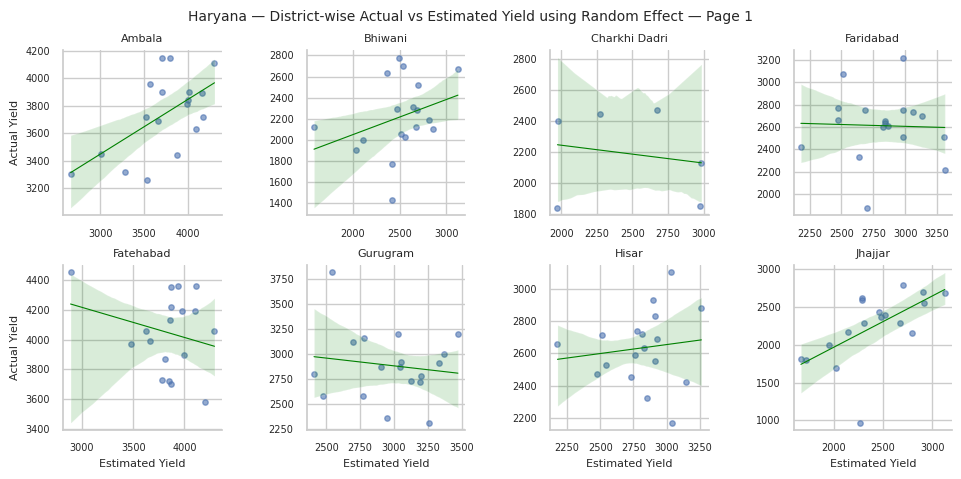

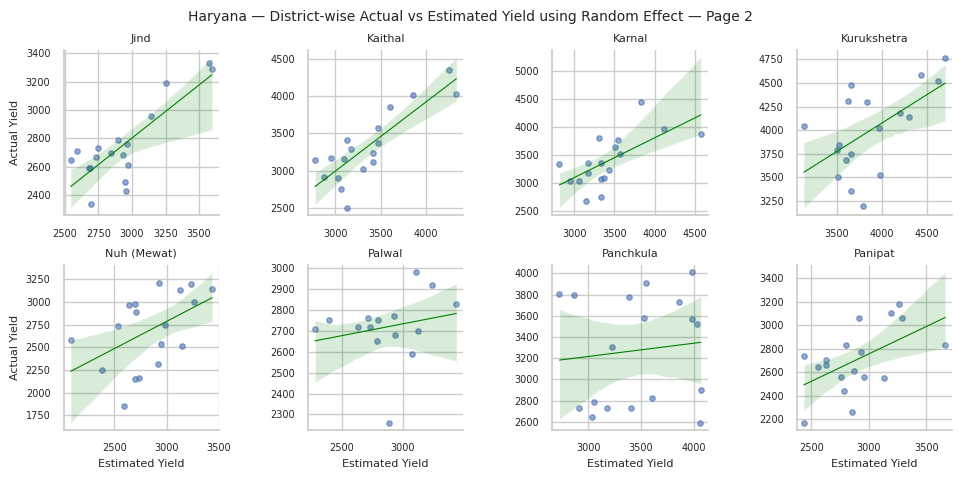

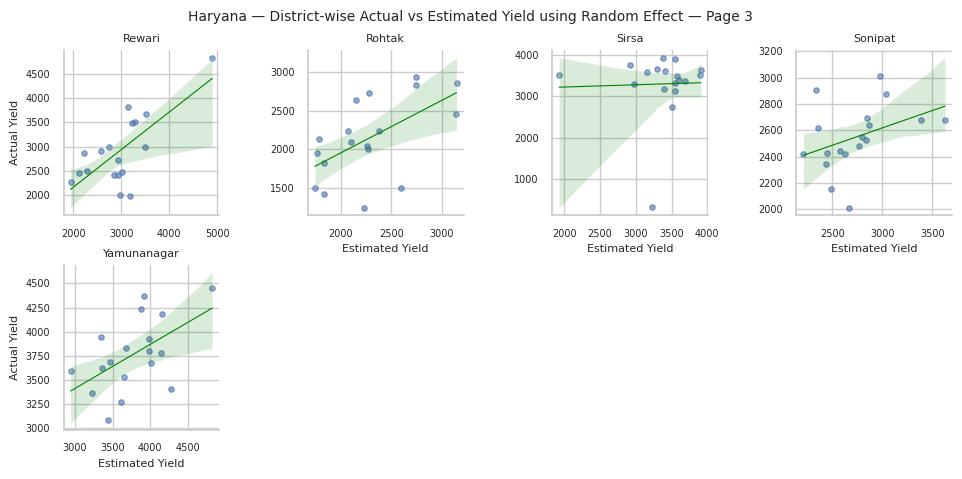

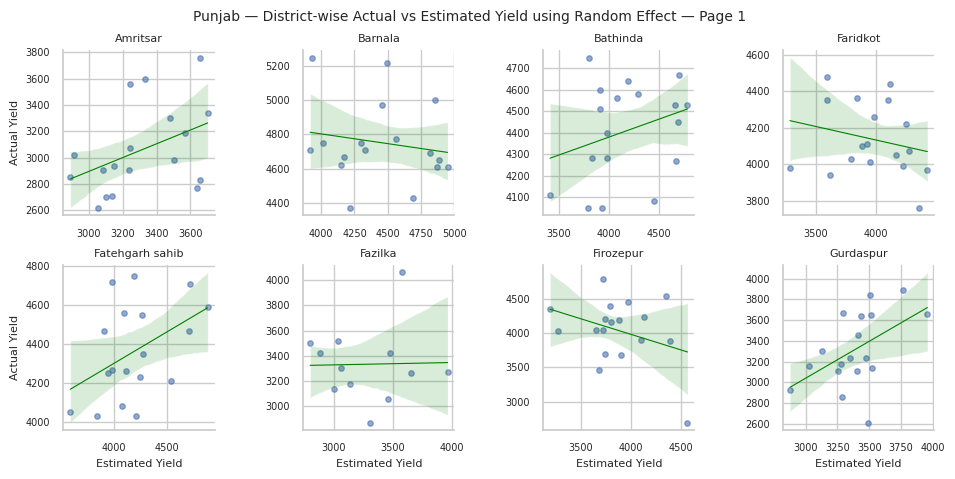

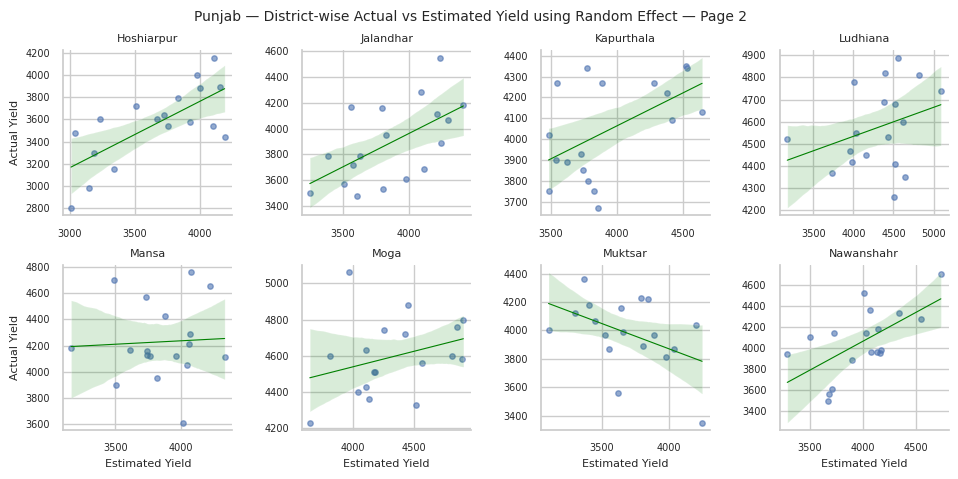

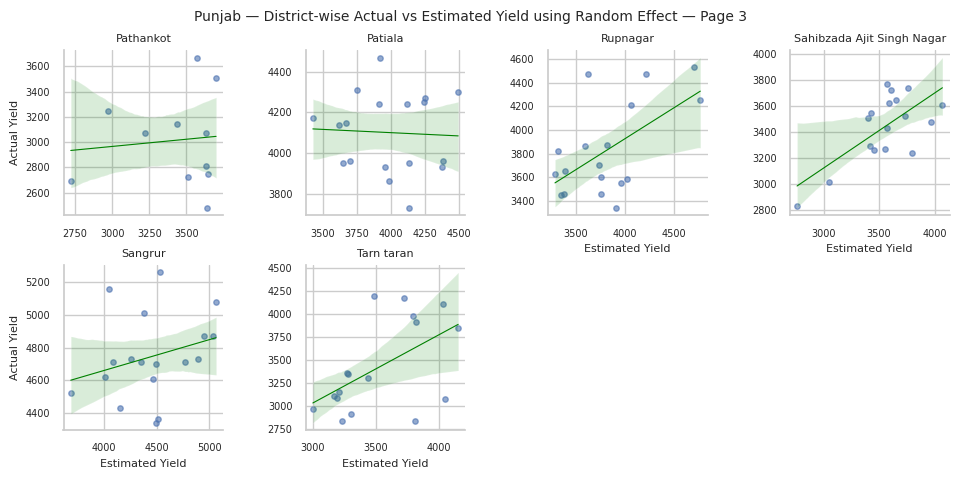

In [7]:
# 1️⃣ Upload your CSV
from google.colab import files
uploaded = files.upload()

# 2️⃣ Read your CSV
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv(list(uploaded.keys())[0])

# 3️⃣ Prepare small font theme
sns.set_theme(style="whitegrid", context="notebook")

# Get unique states
states_list = df["state"].unique()

# Function to split list into chunks of size n
def chunks(lst, n):
    for i in range(0, len(lst), n):
        yield lst[i:i + n]

# 4️⃣ Loop through each state separately
for state in states_list:
    df_state = df[df["state"] == state]

    # Get districts for this state
    districts_list = df_state["districts"].unique()

    # Create separate pages with 8 districts each
    for i, group in enumerate(chunks(districts_list, 8), start=1):
        subset = df_state[df_state["districts"].isin(group)]

        g = sns.FacetGrid(
            subset,
            col="districts",
            col_wrap=4,      # 4 columns → 2 rows → 8 plots
            height=2.5,
            sharex=False,
            sharey=False
        )
        g.map_dataframe(
            sns.regplot,
            x="Estimated",
            y="Actual",
            scatter_kws={"alpha":0.6, "s":15},  # small dots
            line_kws={"color":"green", "lw":0.8}  # thin line
        )

        g.set_titles(col_template="{col_name}", size=8)
        g.set_axis_labels("Estimated Yield", "Actual Yield", fontsize=8)

        for ax in g.axes.flatten():
            ax.tick_params(axis='both', labelsize=7)

        plt.subplots_adjust(top=0.9, hspace=0.3)
        g.fig.suptitle(
            f"{state} — District-wise Actual vs Estimated Yield using Random Effect — Page {i}",
            fontsize=10
        )

        plt.show()


/tmp/ipython-input-3107058983.py:19: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(rmse_percent)
/tmp/ipython-input-3107058983.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


      State                    District    RMSE (%)
0   Haryana                      Ambala    9.259881
1   Haryana                     Bhiwani   25.875924
2   Haryana               Charkhi Dadri   31.078679
3   Haryana                   Faridabad   20.124081
4   Haryana                   Fatehabad   11.396363
5   Haryana                    Gurugram   17.115746
6   Haryana                       Hisar   15.093521
7   Haryana                     Jhajjar   33.511626
8   Haryana                        Jind    9.641235
9   Haryana                     Kaithal    8.782340
10  Haryana                      Karnal   10.589116
11  Haryana                 Kurukshetra   10.463408
12  Haryana                 Nuh (Mewat)   17.536550
13  Haryana                      Palwal   13.085818
14  Haryana                   Panchkula   22.193325
15  Haryana                     Panipat   13.140407
16  Haryana                      Rewari   22.664096
17  Haryana                      Rohtak   28.623362
18  Haryana 

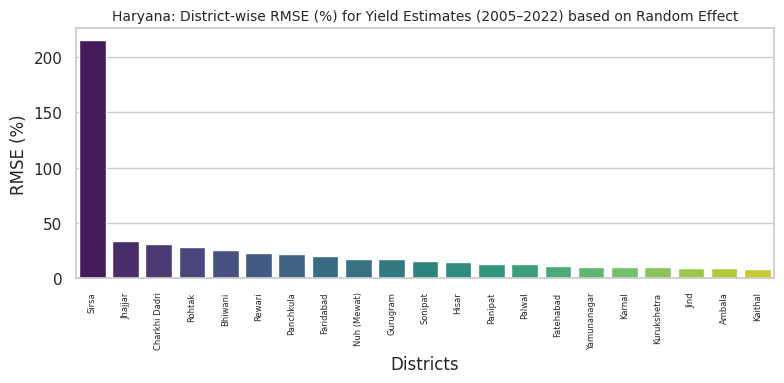

/tmp/ipython-input-3107058983.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


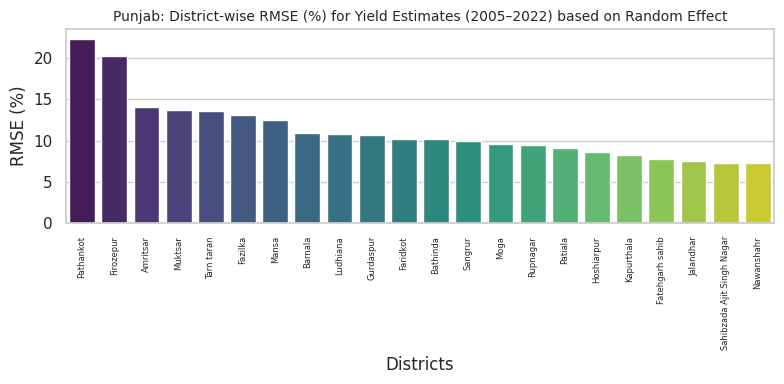

In [8]:
# --- RMSE (%) Calculation ---
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure year filter
df_filtered = df[(df["year"] >= 2005) & (df["year"] <= 2022)].copy()

# Function to compute RMSE (%)
def rmse_percent(x):
    errors = ((x["Estimated"] - x["Actual"]) / x["Actual"]) ** 2
    return np.sqrt(errors.mean()) * 100

# Group by state + district and calculate RMSE%
rmse_table = (
    df_filtered
    .groupby(["state", "districts"])
    .apply(rmse_percent)
    .reset_index()
)
rmse_table.columns = ["State", "District", "RMSE (%)"]

# --- Show table ---
pd.set_option("display.max_rows", None)  # show all rows
print(rmse_table)

# --- Optional: save table to CSV ---
rmse_table.to_csv("state_districtwise_RMSE.csv", index=False)

# --- Graphical representation ---
for state in rmse_table["State"].unique():
    subset = rmse_table[rmse_table["State"] == state]

    plt.figure(figsize=(8,4))
    sns.barplot(
        data=subset.sort_values("RMSE (%)", ascending=False),
        x="District", y="RMSE (%)", palette="viridis"
    )
    plt.xticks(rotation=90, fontsize=6)
    plt.title(f"{state}: District-wise RMSE (%) for Yield Estimates (2005–2022) based on Random Effect", fontsize=10)
    plt.ylabel("RMSE (%)")
    plt.xlabel("Districts")
    plt.tight_layout()
    plt.show()
